# Conexión al repositorio de datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de archivo

In [4]:
#Importamos pandas
import pandas as pd

In [5]:
#Leemos el archivo de datos
df = pd.read_csv('/content/drive/MyDrive/Data/data_clustering.csv')
df

,x1,x2
0,2.052304,1.580694
1,1.647581,3.933819
2,-1.298583,3.672671
3,2.475013,0.810699
4,2.340742,1.433814
...,...,...
2995,-2.393835,2.097582
2996,1.138705,4.802346
2997,1.101769,4.831166
2998,-1.291882,2.790719


# Pintado de features

In [6]:
import matplotlib.pyplot as plt

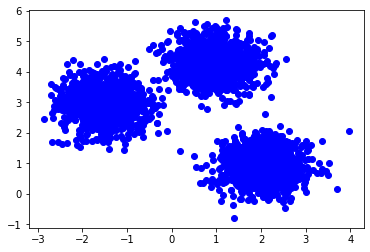

In [7]:
#Graficamos los datos
x1 = df['x1'].values
x2 = df['x2'].values

plt.scatter(x1, x2, c='blue', marker='o')
plt.show()

# Definición de features

In [8]:
#Obtenemos los features como un tensor de orden 2
x = df.values
x.shape

(3000, 2)

# Definimos el modelo de clusterizacion

In [9]:
#Importamos el objeto para clusterizar
from sklearn.cluster import KMeans

In [10]:
#Configuramos la clusterización
model = KMeans(
    n_clusters=3, # Cantidad de centroides que quiero probar
    init='random', #Ubique los centrides de manera aleatoria
    n_init=10, ### Numero de iteraciones
    max_iter=300, # Cantidad de iteraciones
    tol=1e-04, 
    random_state=0
)

In [11]:
#Entrenamos el modelo
y = model.fit_predict(x)
y

array([1, 2, 0, ..., 2, 0, 0], dtype=int32)

In [12]:
#Cada punto pertenece a un clúster
y.shape

(3000,)

In [13]:
#Importamos numpy
import numpy as np

In [14]:
#Vemos que se crearon tres clústers
np.unique(y)

array([0, 1, 2], dtype=int32)

# Filtrando los registros por cluster

In [15]:
#Registros del cluster 0
x[y == 0].shape

(1001, 2)

In [16]:
#Registros del cluster 1
x[y == 1].shape

(1000, 2)

In [17]:
#Registros del cluster 2
x[y == 2].shape

(999, 2)

# Centroides de cada clúster

In [18]:
#Centroides
centroides = model.cluster_centers_
centroides

array([[-1.52389451,  2.9210095 ],
       [ 2.02212104,  0.89961216],
       [ 0.9637014 ,  4.29690403]])

# Graficando los clusters

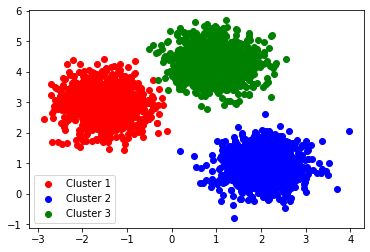

In [ ]:
#Graficamos cada clúster
plt.scatter(x[y == 0, 0], x[y == 0, 1], c='red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], c='green', label = 'Cluster 3')

#Agregamos la leyenda
plt.legend()

#Mostramos el gráfico
plt.show()

# Graficando los clúster y sus centroides

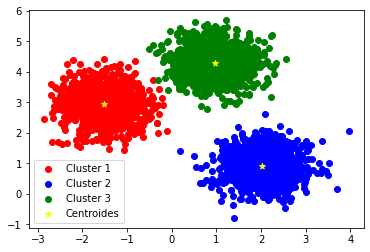

In [ ]:
#Graficamos cada clúster
plt.scatter(x[y == 0, 0], x[y == 0, 1], c='red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], c='green', label = 'Cluster 3')

#Graficamos los centroides
plt.scatter(centroides[:, 0], centroides[:, 1], marker = '*', c = 'yellow', label = 'Centroides')

#Agregamos la leyenda
plt.legend()

#Mostramos el gráfico
plt.show()

# ¿Y si probamos otro valor para K? k=5

In [ ]:
#Configuramos la clusterización
model = KMeans(
    n_clusters=5, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

In [ ]:
#Entrenamos el modelo
y = model.fit_predict(x)
y

array([4, 2, 3, ..., 2, 0, 0], dtype=int32)

In [ ]:
#Centroides
centroides = model.cluster_centers_
centroides

array([[-1.27830896,  2.59681649],
       [ 2.10463058,  0.53249403],
       [ 0.9637014 ,  4.29690403],
       [-1.76510327,  3.23942482],
       [ 1.92795062,  1.31861422]])

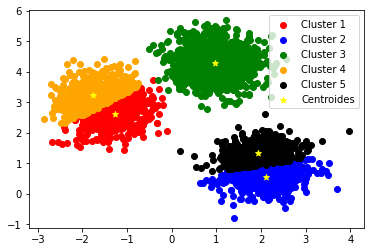

In [ ]:
#Graficamos cada clúster
plt.scatter(x[y == 0, 0], x[y == 0, 1], c='red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], c='green', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], c='orange', label = 'Cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], c='black', label = 'Cluster 5')

#Graficamos los centroides
plt.scatter(centroides[:, 0], centroides[:, 1], marker = '*', c = 'yellow', label = 'Centroides')

#Agregamos la leyenda
plt.legend()

#Mostramos el gráfico
plt.show()

In [ ]:
#¿Cómo sabemos cuál es el mejor valor para K?
#Utilizaremos la inercia como medida
model.inertia_

1128.113908268916